In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid') 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check missing data
# Training set
for col in train.columns:
  if train[col].isna().sum() != 0:
    print(col,train[col].isna().sum())
print('-------------------------------')
# Test set
for col in test.columns:
  if test[col].isna().sum() != 0:
    print(col,test[col].isna().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406
-------------------------------
MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


#Modifying Columns 

In [6]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)

In [7]:
#Id
test_Id_copy = test['Id']
train=train.drop(columns='Id')
test=test.drop(columns='Id')

#Alley,FireplaceQu,PoolQC,Fence,MiscFeature
train.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace=True)
test.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace=True)

#Street
train=train.drop(columns='Street')
test=test.drop(columns='Street')

#Utilities
train=train.drop(columns='Utilities')
test=test.drop(columns='Utilities')

#Condition2
train=train.drop(columns='Condition2')
test=test.drop(columns='Condition2')

#RoofMatl
train=train.drop(columns='RoofMatl')
test=test.drop(columns='RoofMatl')

#Heating
train=train.drop(columns='Heating')
test=test.drop(columns='Heating')

#3SsnPorch
train=train.drop(columns='3SsnPorch')
test=test.drop(columns='3SsnPorch')

#PoolArea
train=train.drop(columns='PoolArea')
test=test.drop(columns='PoolArea')

#LowQualFinSF
train=train.drop(columns='LowQualFinSF')
test=test.drop(columns='LowQualFinSF')

In [8]:
#LotFrontage
train['LotFrontage'] = imputer.fit_transform(train['LotFrontage'].values.reshape(-1,1))
test['LotFrontage'] = imputer.transform(test['LotFrontage'].values.reshape(-1,1))

#MasVnrType
train['MasVnrType'].fillna(train['MasVnrType'].value_counts().index[0],inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].value_counts().index[0],inplace=True)

#MasVnrArea
train['MasVnrArea'].fillna(train['MasVnrArea'].value_counts().index[0],inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].value_counts().index[0],inplace=True)

In [9]:
#BsmtQual
#filling 'Unknown'
train['BsmtQual'].fillna('Unknown',inplace=True)
test['BsmtQual'].fillna('Unknown',inplace=True)

#BsmtCond
#filling 'Unknown'
train['BsmtCond'].fillna('Unknown',inplace=True)
test['BsmtCond'].fillna('Unknown',inplace=True)

#BsmtExposure
#filling 'Unknown'
train['BsmtExposure'].fillna('Unknown',inplace=True)
test['BsmtExposure'].fillna('Unknown',inplace=True)

# BsmtFinType1
#filling 'Unknown'
train['BsmtFinType1'].fillna('Unknown',inplace=True)
test['BsmtFinType1'].fillna('Unknown',inplace=True)

# BsmtFinType2
#filling 'Unknown'
train['BsmtFinType2'].fillna('Unknown',inplace=True)
test['BsmtFinType2'].fillna('Unknown',inplace=True)

#Electrical
train['Electrical'].replace(to_replace='FuseP',value='Other',inplace=True)
train['Electrical'].replace(to_replace='Mix',value='Other',inplace=True)
train['Electrical'].fillna('Other',inplace=True)

test['Electrical'].replace(to_replace=['FuseP','Mix'],value='Other',inplace=True)

#GarageType 
#filling 'Unknown'
train['GarageType'].fillna('Unknown',inplace=True)
test['GarageType'].fillna('Unknown',inplace=True)

#GarageYrBlt 
train['GarageYrBlt'] = imputer.fit_transform(train['GarageYrBlt'].values.reshape(-1,1))
test['GarageYrBlt'] = imputer.transform(test['GarageYrBlt'].values.reshape(-1,1))

#GarageFinish
#filling 'Unknown'
train['GarageFinish'].fillna('Unknown',inplace=True)
test['GarageFinish'].fillna('Unknown',inplace=True)

#GarageQual
#filling 'Unknown'
train['GarageQual'].fillna('Unknown',inplace=True)
test['GarageQual'].fillna('Unknown',inplace=True)

#GarageCond 
#filling 'Unknown'
train['GarageCond'].fillna('Unknown',inplace=True)
test['GarageCond'].fillna('Unknown',inplace=True)

In [10]:
#Test Set
#MSZoning
test['MSZoning'].fillna(test['MSZoning'].mode()[0],inplace=True)

#Exterior1st
test['Exterior1st'].replace(to_replace=['BrkComm','AsphShn','CBlock'],value='Other',inplace=True)
train['Exterior1st'].replace(to_replace=['BrkComm','AsphShn','CBlock','ImStucc','Stone'],value='Other',inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].value_counts().index[0],inplace=True)

#Exterior2nd  
test['Exterior2nd'].fillna('Other',inplace=True)

#BsmtFinSF1
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean()).astype(int)

#BsmtFinSF2
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean()).astype(int)

#BsmtUnfSF
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean()).astype(int)

#TotalBsmtSF
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean()).astype(int)

#BsmtFullBath
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean()).astype(int)

#BsmtHalfBath
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean()).astype(int)

#KitchenQual
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0],inplace=True)

#Functional
test['Functional'].fillna(test['Functional'].mode()[0],inplace=True)

#GarageCars
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean()).astype(int)

#GarageArea
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean()).astype(int)

#GarageYrBlt
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)
test['GarageYrBlt'] = test['GarageYrBlt'].astype(int)

#LotFrontage
train['LotFrontage'] = train['LotFrontage'].astype(int)
test['LotFrontage'] = test['LotFrontage'].astype(int)

#MasVnrArea
train['MasVnrArea'] = train['MasVnrArea'].astype(int)
test['MasVnrArea'] = test['MasVnrArea'].astype(int)

#SaleType
test['SaleType'].fillna(test['SaleType'].mode()[0],inplace=True)

#HouseStyle
#Missing value in test 2.5Fin
train['HouseStyle'] = train['HouseStyle'][train['HouseStyle'] != '2.5Fin']


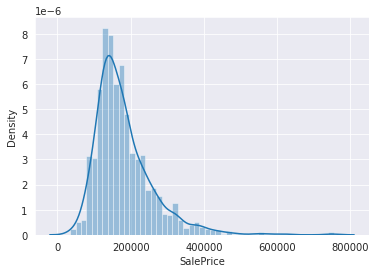

In [11]:
sns.distplot(train['SalePrice'])

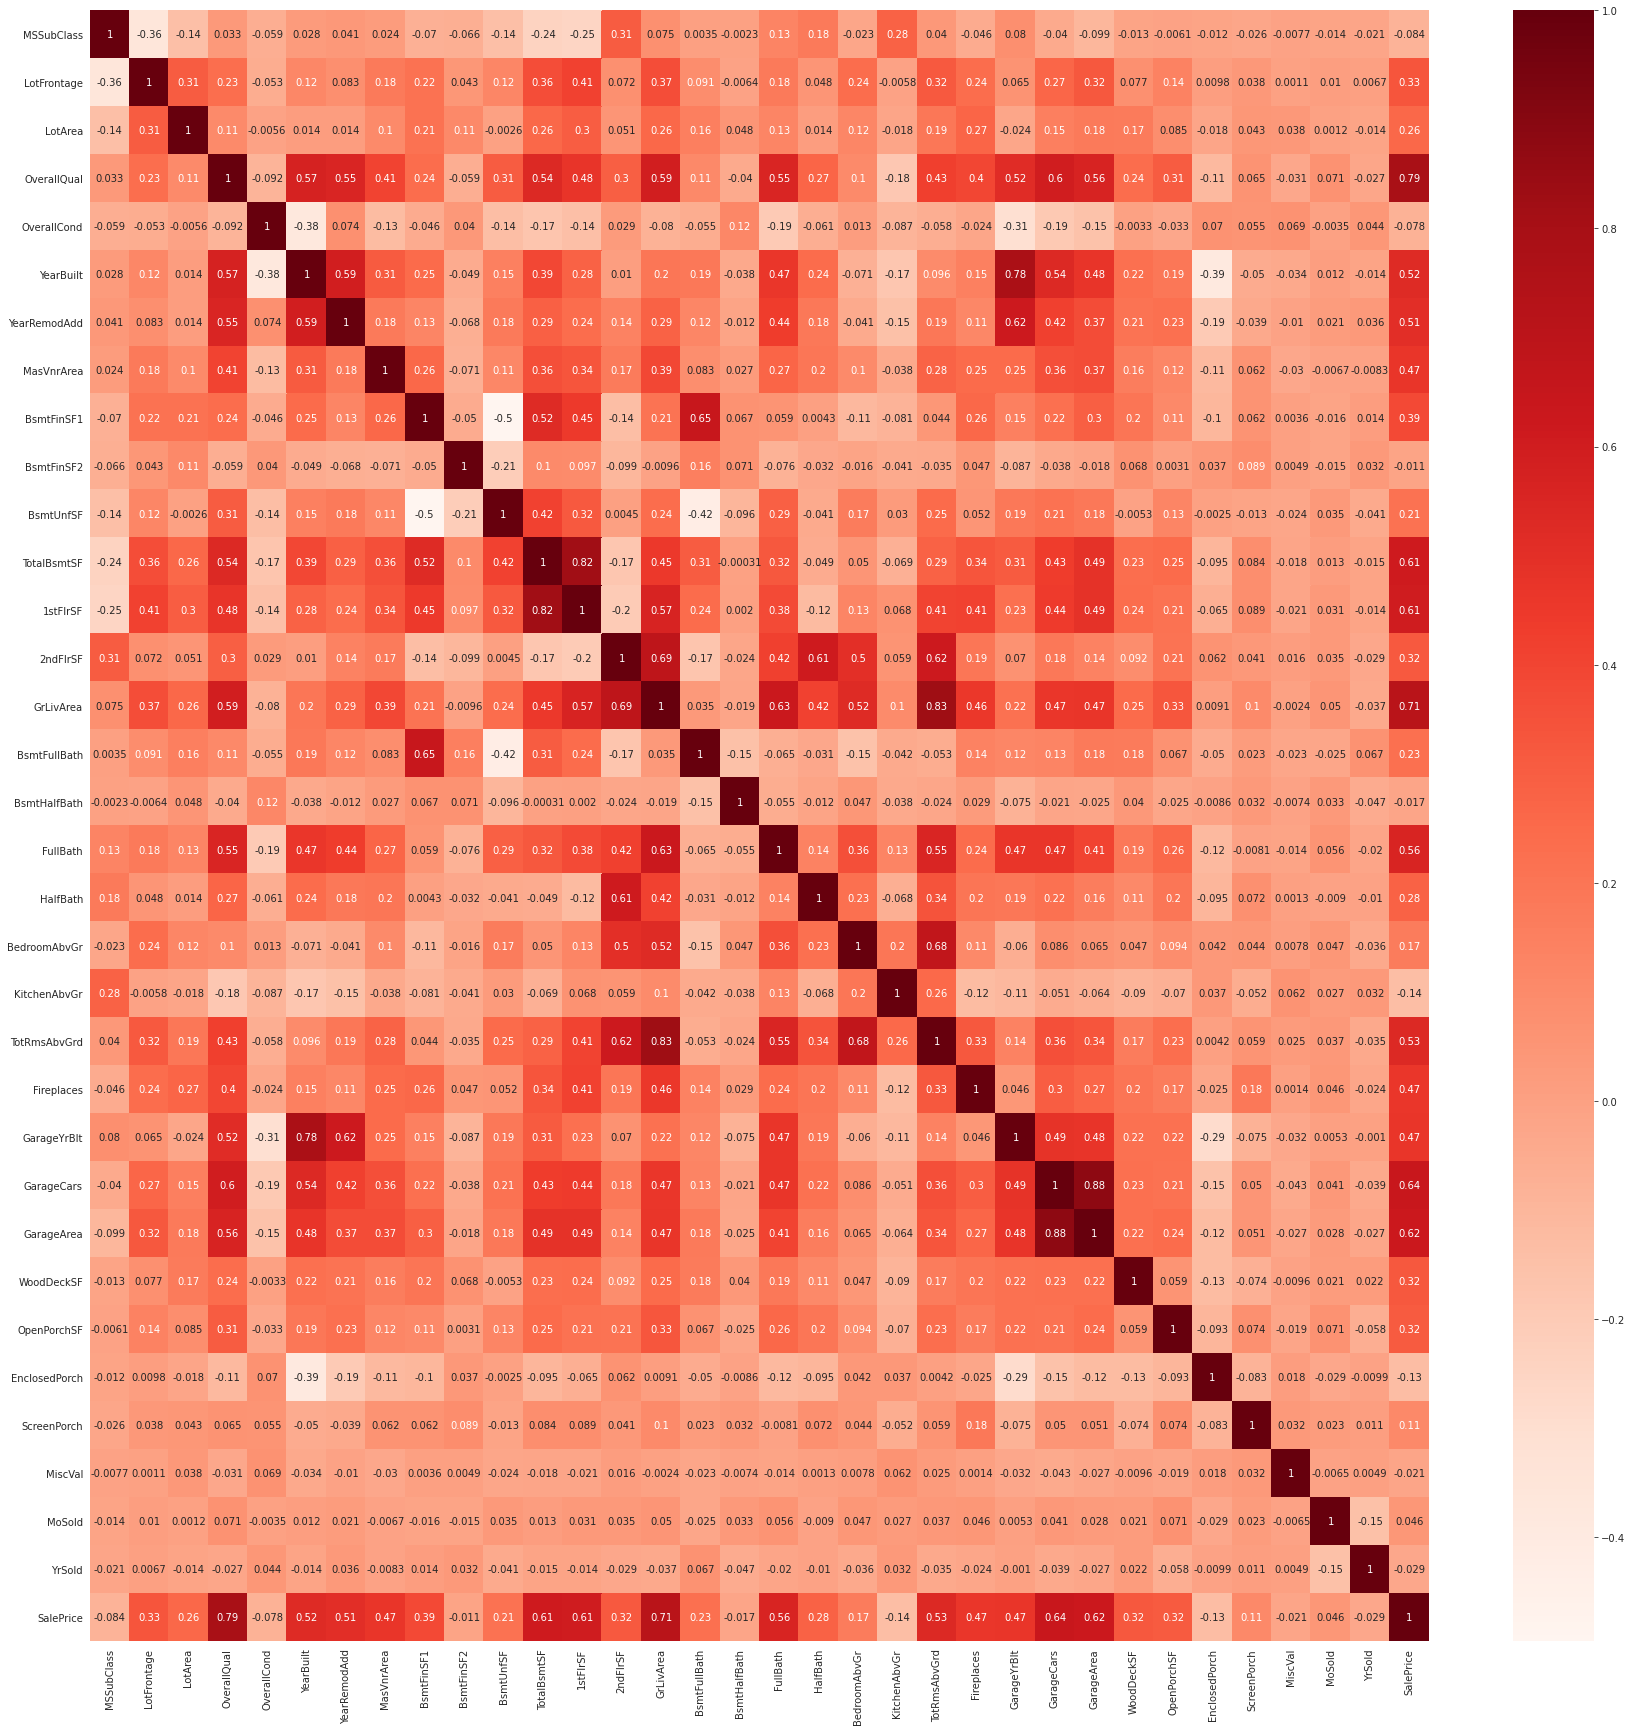

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),annot=True,cmap='Reds')

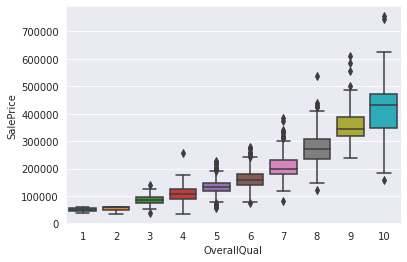

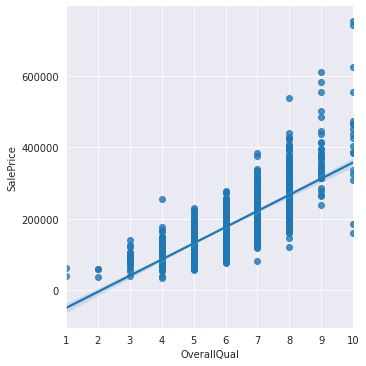

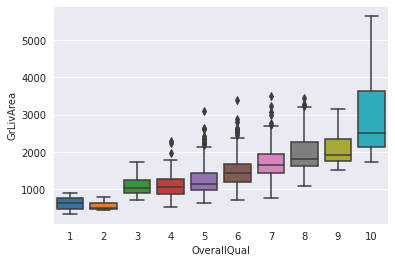

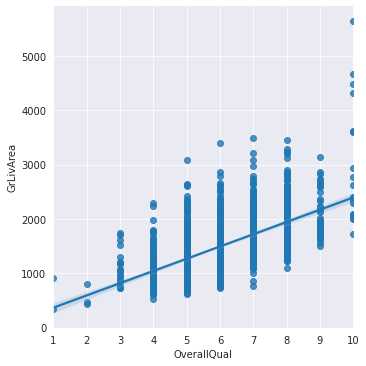

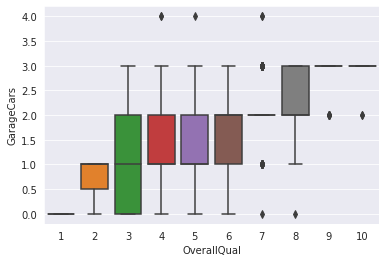

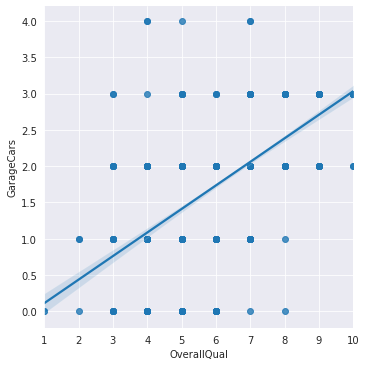

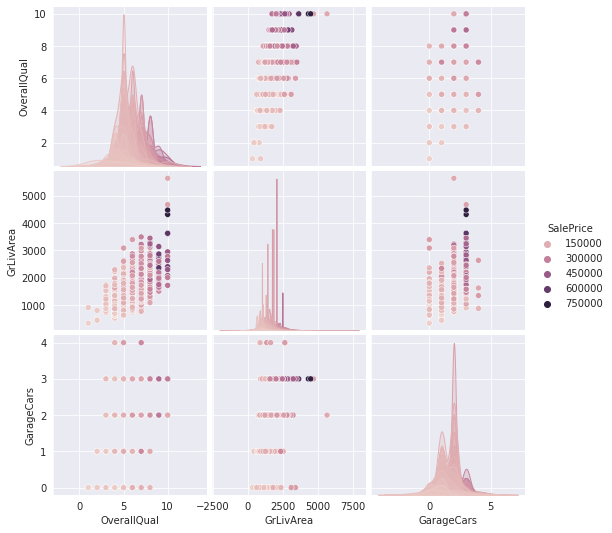

In [13]:
#From the above heatmap
sns.boxplot(data=train,y='SalePrice',x='OverallQual')
plt.show()
sns.lmplot(data=train,y='SalePrice',x='OverallQual')
plt.show()

sns.boxplot(data=train,y='GrLivArea',x='OverallQual')
plt.show()
sns.lmplot(data=train,y='GrLivArea',x='OverallQual')
plt.show()

sns.boxplot(data=train,y='GarageCars',x='OverallQual')
plt.show()
sns.lmplot(data=train,y='GarageCars',x='OverallQual')
plt.show()

sns.pairplot(data=train,hue='SalePrice',vars=['OverallQual','GrLivArea','GarageCars'])
plt.show()

# Scaling

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
#INT columns
#OverallQual
train['OverallQual'] = le.fit_transform(train['OverallQual'])
test['OverallQual'] = le.transform(test['OverallQual'])

#OverallCond
train['OverallCond'] = le.fit_transform(train['OverallCond'])
test['OverallCond'] = le.transform(test['OverallCond'])

#YearRemodAdd
train['YearRemodAdd'] = le.fit_transform(train['YearRemodAdd'])
test['YearRemodAdd'] = le.transform(test['YearRemodAdd'])

#SalePrice
train['SalePrice'] =sc.fit_transform(train['SalePrice'].values.reshape(-1,1))

In [16]:
#OBJECT columns
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [17]:
missing_cols = set( train.columns ) - set( test.columns )
print(missing_cols)

{'SalePrice', 'GarageQual_Ex'}


# Removing Skewed Data

In [18]:
skewness_test = test.skew()
skewness_test.sort_values(ascending=False,inplace=True)
skewness_test = skewness_test[0:50]

skewness_train = train.skew()
skewness_train.sort_values(ascending=False,inplace=True)
skewness_train = skewness_train[0:50]

In [19]:
#Cannot use boxcox since value 0 exists
from scipy.special import boxcox1p
for i in skewness_train.index:
  train[i] = boxcox1p(train[i],0)[0]
for i in skewness_test.index:
  test[i] = boxcox1p(test[i],0)[0]

# Creating model

In [20]:
train_x = train.drop(columns='SalePrice')
train_y = train['SalePrice']

test_x = test

In [21]:
from catboost import CatBoostRegressor
regressor= CatBoostRegressor(silent=True)
regressor.fit(train_x,train_y)
regressor.score(train_x,train_y)

0.992863157552595

In [22]:
y_pred = regressor.predict(test_x)

In [23]:
y_pred = sc.inverse_transform(y_pred)
print(y_pred)

[122678.77300223 160065.45770888 185096.10528363 ... 165386.39068229
 115093.63799149 227409.43038418]


In [24]:
y_pred = pd.DataFrame(y_pred)
prediction = pd.concat([test_Id_copy,y_pred],axis=1)

In [25]:
prediction.rename({0:'SalePrice'},axis=1,inplace=True)
prediction.to_csv('my_submission.csv',index = False)